# 1. 20240424 OpenNEM

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive
drive.mount('/content/drive')

# CSV
file_path = '/content/drive/My Drive/MA/20240424 OpenNEM.csv'
data = pd.read_csv(file_path)

#
data.head()



Mounted at /content/drive


,date,Battery (Charging) - GWh,Pumps - GWh,Coal (Brown) - GWh,Coal (Black) - GWh,Bioenergy (Biogas) - GWh,Bioenergy (Biomass) - GWh,Distillate - GWh,Gas (Steam) - GWh,Gas (CCGT) - GWh,...,Gas (Steam) Market Value - AUD,Gas (CCGT) Market Value - AUD,Gas (OCGT) Market Value - AUD,Gas (Reciprocating) Market Value - AUD,Gas (Waste Coal Mine) Market Value - AUD,Battery (Discharging) Market Value - AUD,Hydro Market Value - AUD,Wind Market Value - AUD,Solar (Utility) Market Value - AUD,Solar (Rooftop) Market Value - AUD
0,2024-04-24,-2.47,-3.94,77.30,230.3,0.10,0.33,0.0,1.74,9.00,...,70844.0,1003652.0,856918.0,100260.0,90412.0,201794.0,2242709.0,5194386.0,1346009.0,1236536.0
1,2024-04-25,-1.83,-6.08,82.63,229.8,0.10,0.59,0.0,3.19,10.90,...,327834.0,1145820.0,950409.0,97744.0,85510.0,89889.0,2608397.0,4869138.0,276407.0,-86015.0
2,2024-04-26,-1.51,-4.39,84.37,245.7,0.10,0.59,0.0,7.29,18.06,...,1181657.0,2795604.0,1996281.0,291700.0,131989.0,388812.0,5450289.0,4659575.0,3104201.0,3488007.0
3,2024-04-27,-2.00,-5.68,78.93,231.4,0.27,0.59,0.0,6.19,10.83,...,1049209.0,1436101.0,1707619.0,219681.0,99666.0,304059.0,4536454.0,3417322.0,777734.0,445271.0
4,2024-04-28,-2.21,-3.40,74.72,224.8,0.36,0.59,0.0,3.32,8.61,...,392455.0,1178332.0,1338096.0,133242.0,99129.0,330323.0,3444405.0,4862110.0,258023.0,-867145.0


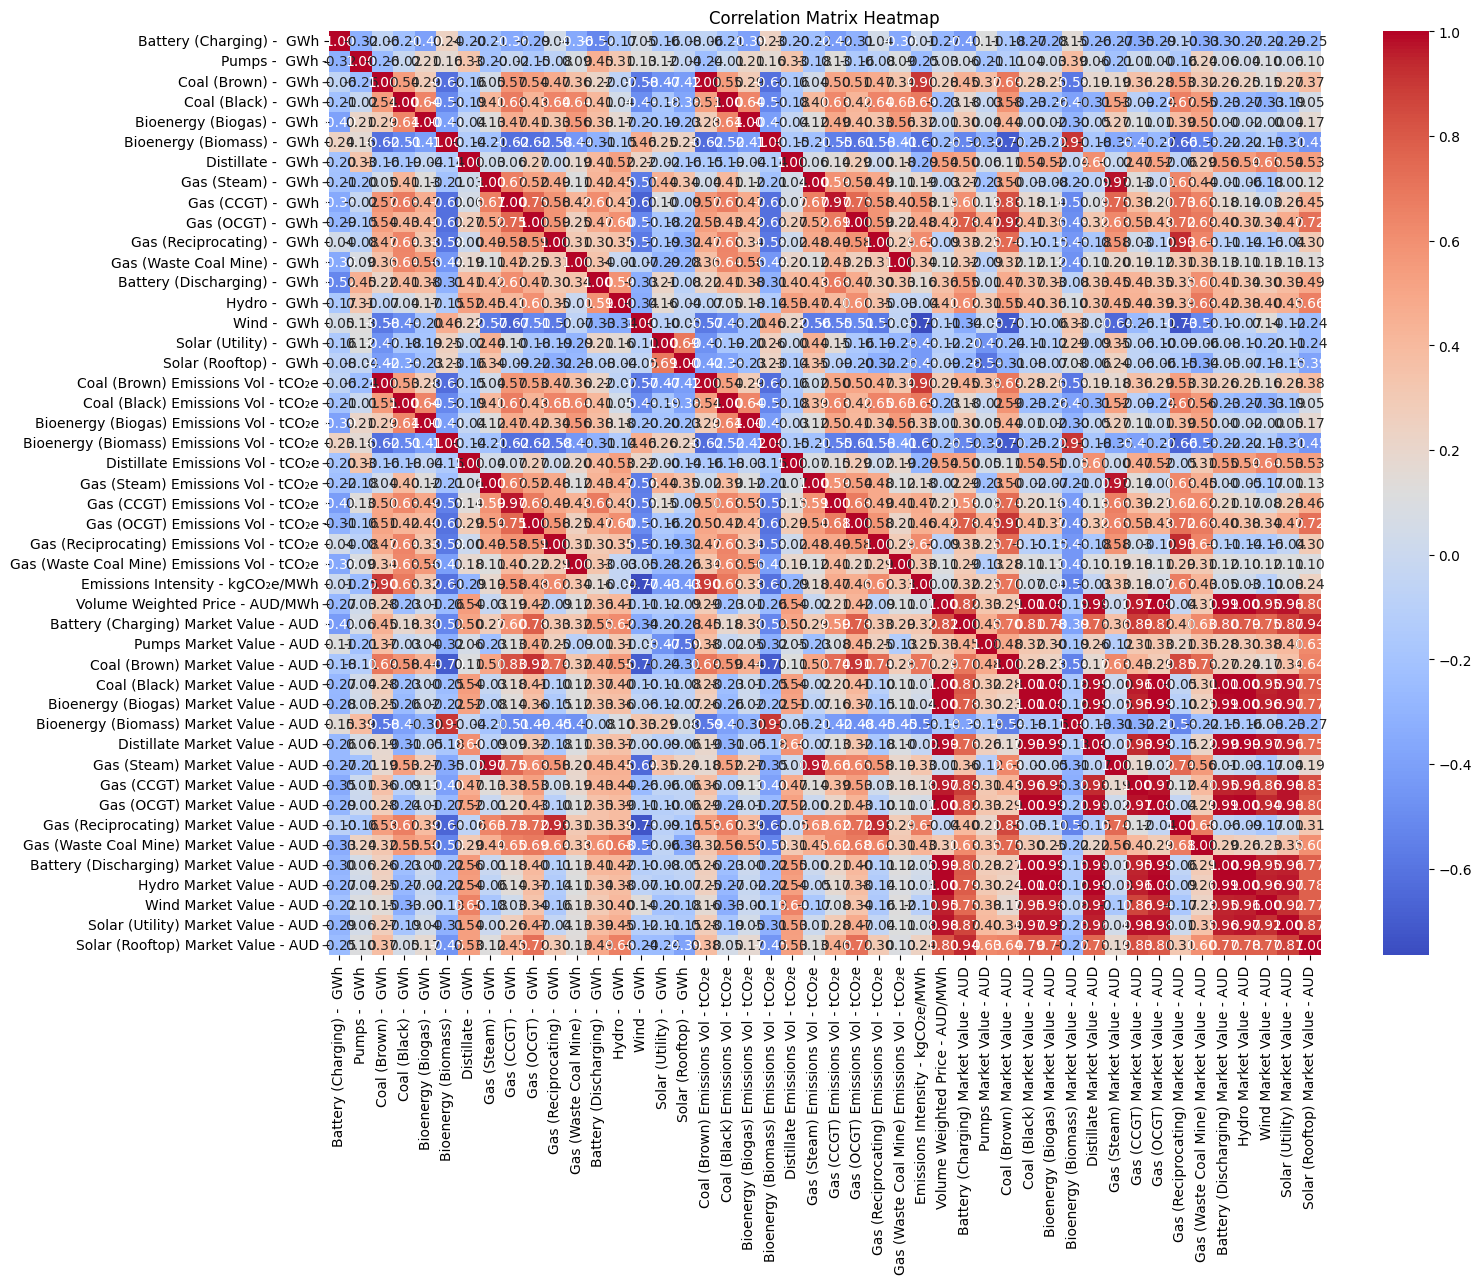

In [ ]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Create Node-Edge Graphs
def create_node_edge_graph(corr_matrix, threshold, greater_than=True):
    if greater_than:
        mask = corr_matrix >= threshold
    else:
        mask = corr_matrix <= threshold

    edges = [(i, j, corr_matrix.iat[i, j]) for i in range(len(corr_matrix.columns))
             for j in range(i+1, len(corr_matrix.columns)) if mask.iat[i, j]]

    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(corr_matrix.columns[edge[0]], corr_matrix.columns[edge[1]], weight=edge[2])

    return graph

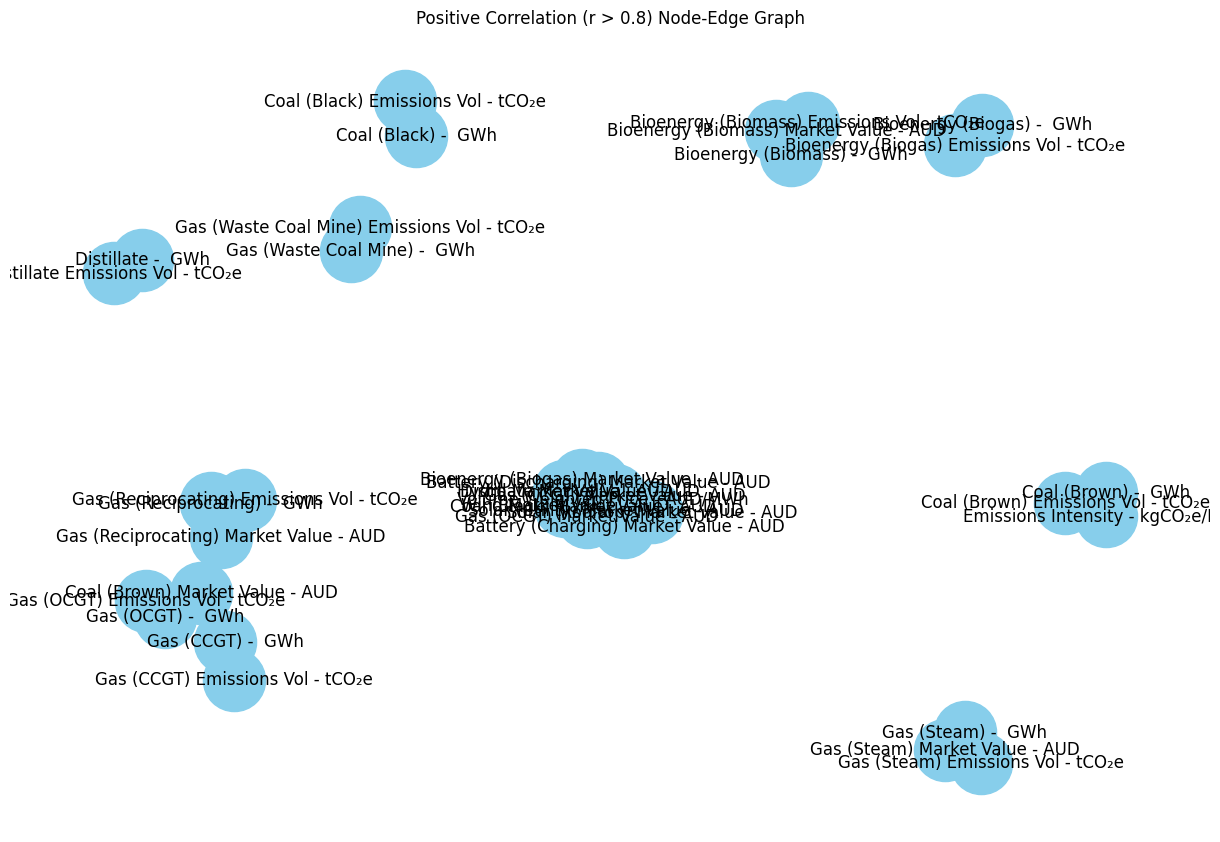

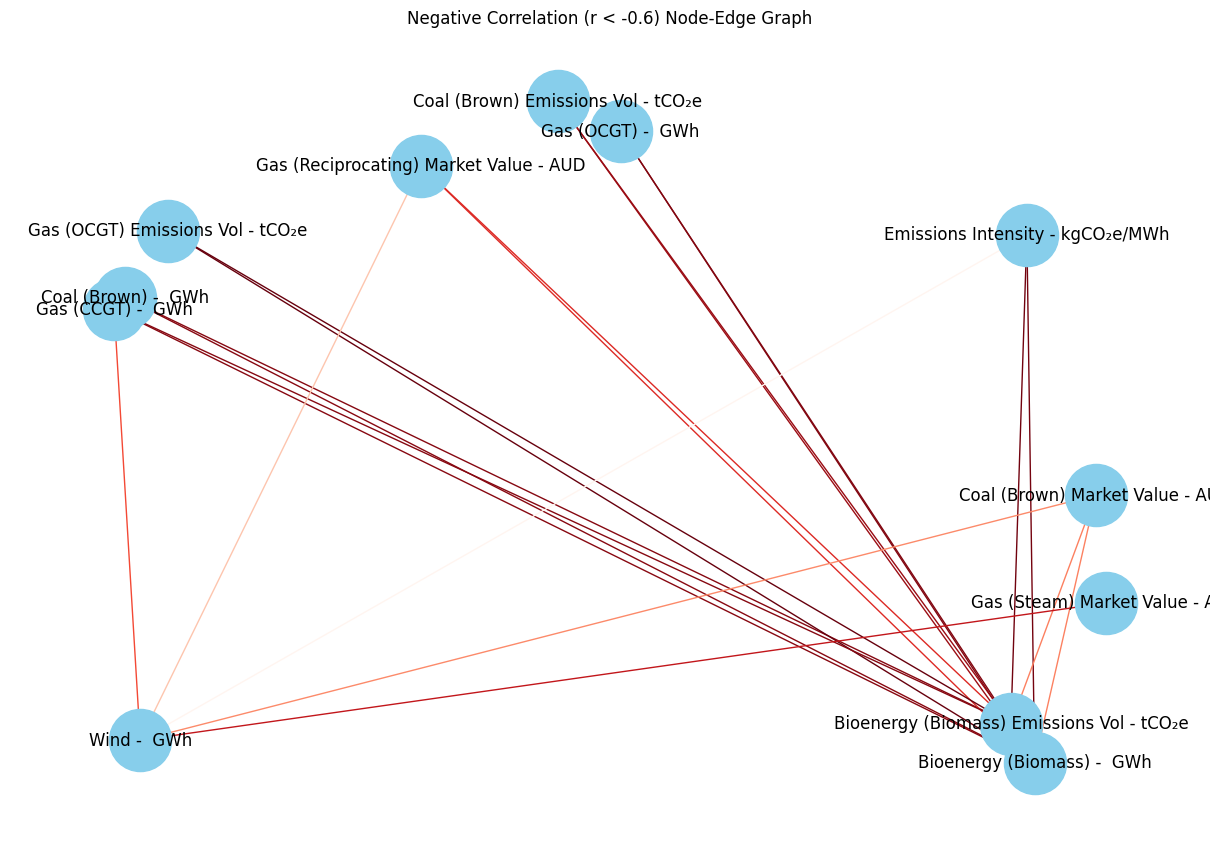

In [ ]:
# Create graphs for correlation > 0.8 and correlation < -0.6
graph_pos = create_node_edge_graph(correlation_matrix, 0.8, greater_than=True)
graph_neg = create_node_edge_graph(correlation_matrix, -0.6, greater_than=False)

# Plot the positive correlation graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph_pos)
edges, weights = zip(*nx.get_edge_attributes(graph_pos, 'weight').items())
nx.draw(graph_pos, pos, node_color='skyblue', node_size=2000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues)
plt.title('Positive Correlation (r > 0.8) Node-Edge Graph')
plt.show()


# Plot the negative correlation graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph_neg)
edges, weights = zip(*nx.get_edge_attributes(graph_neg, 'weight').items())
if edges:
    nx.draw(graph_neg, pos, node_color='skyblue', node_size=2000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Reds)
    plt.title('Negative Correlation (r < -0.6) Node-Edge Graph')
else:
    plt.text(0.5, 0.5, 'No strong negative correlations found', horizontalalignment='center', verticalalignment='center')
plt.show()



# 2. 20240424 OpenNEM

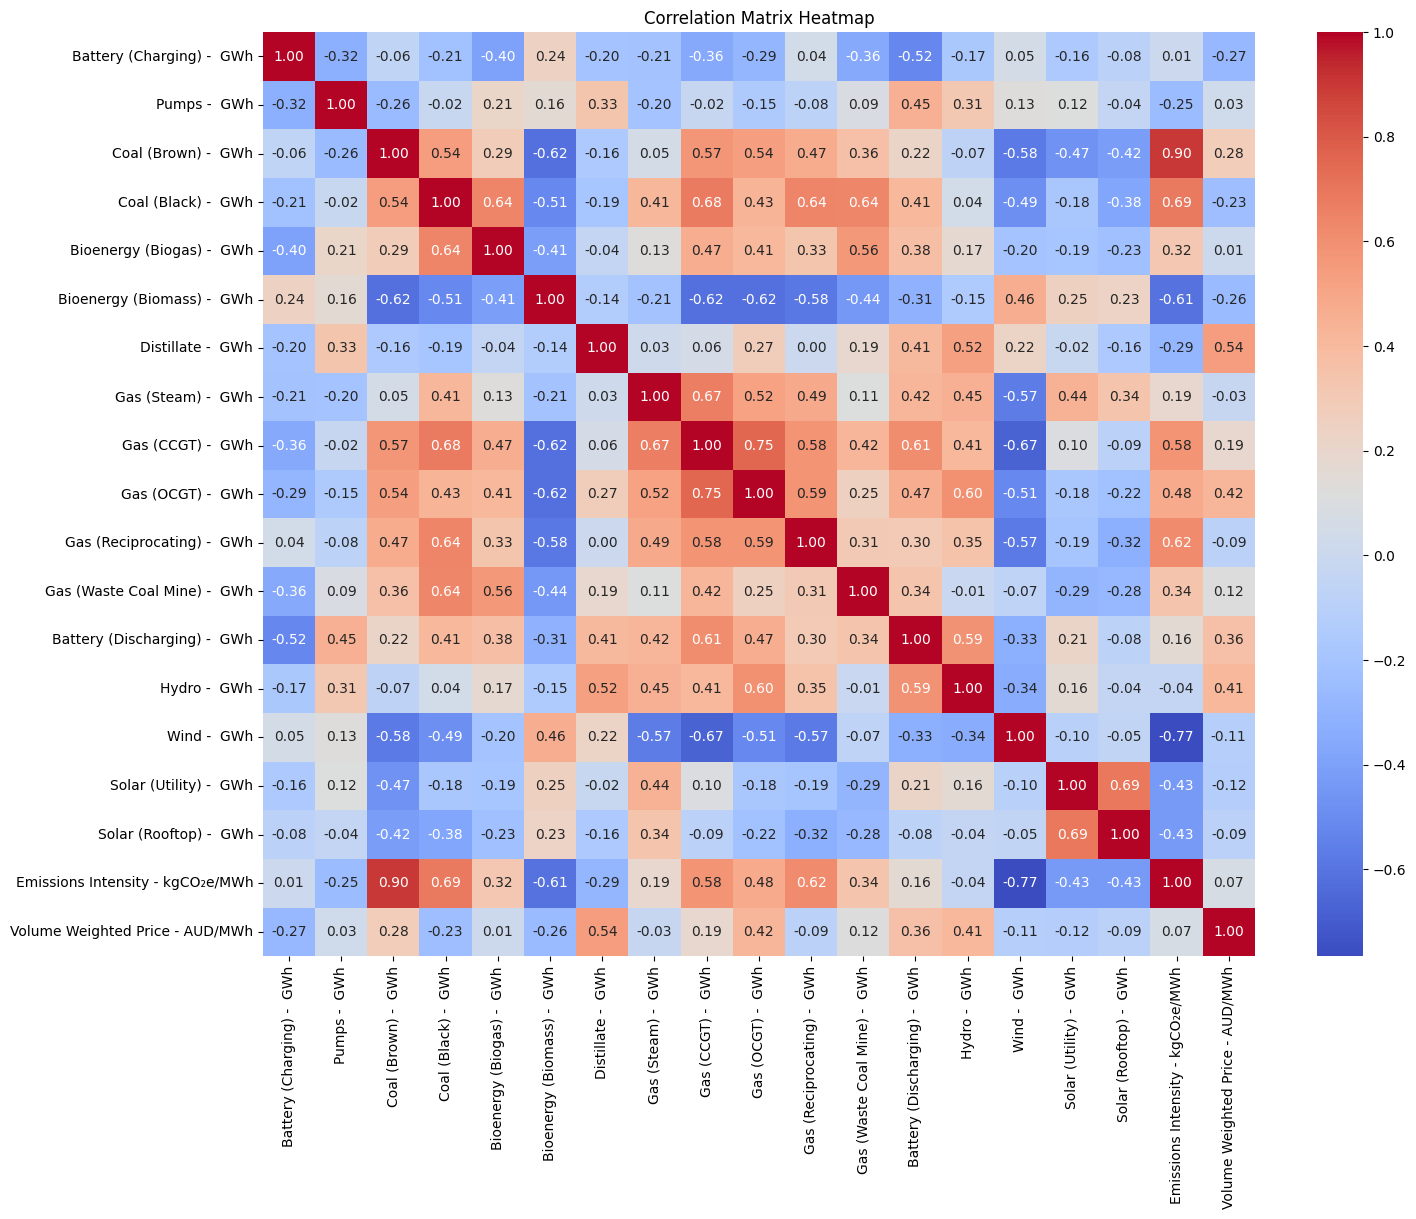

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Select relevant columns for analysis
columns_of_interest = [
    'Battery (Charging) -  GWh', 'Pumps -  GWh', 'Coal (Brown) -  GWh',
    'Coal (Black) -  GWh', 'Bioenergy (Biogas) -  GWh', 'Bioenergy (Biomass) -  GWh',
    'Distillate -  GWh', 'Gas (Steam) -  GWh', 'Gas (CCGT) -  GWh',
    'Gas (OCGT) -  GWh', 'Gas (Reciprocating) -  GWh', 'Gas (Waste Coal Mine) -  GWh',
    'Battery (Discharging) -  GWh', 'Hydro -  GWh', 'Wind -  GWh',
    'Solar (Utility) -  GWh', 'Solar (Rooftop) -  GWh', 'Emissions Intensity - kgCO₂e/MWh',
    'Volume Weighted Price - AUD/MWh'
]

# Filter data to include only these columns
filtered_data = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


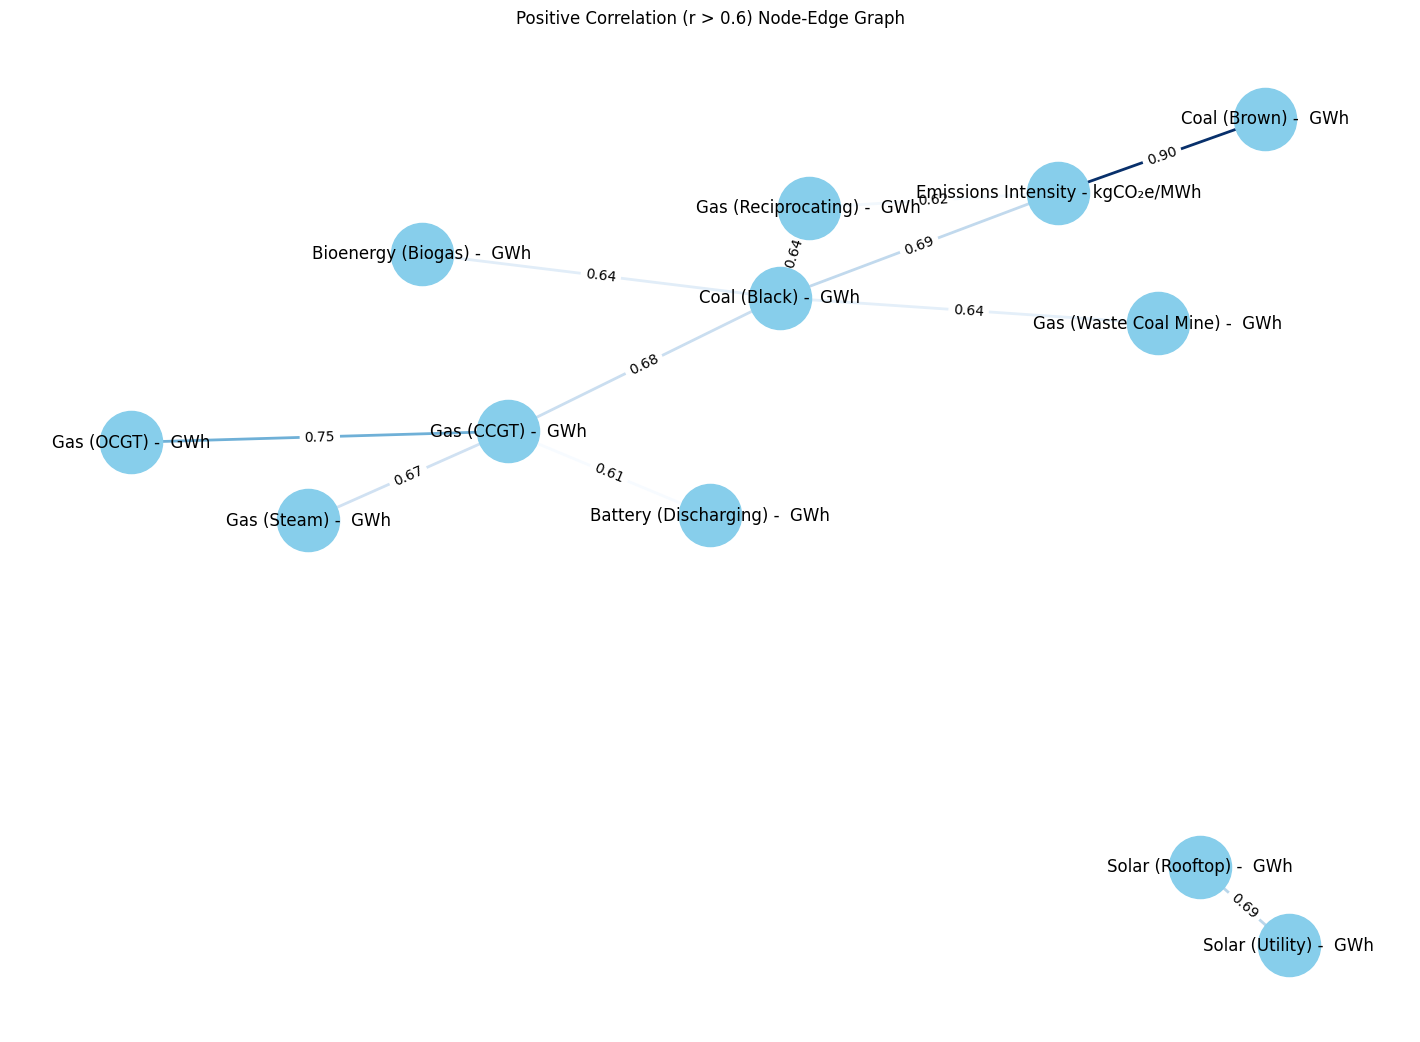

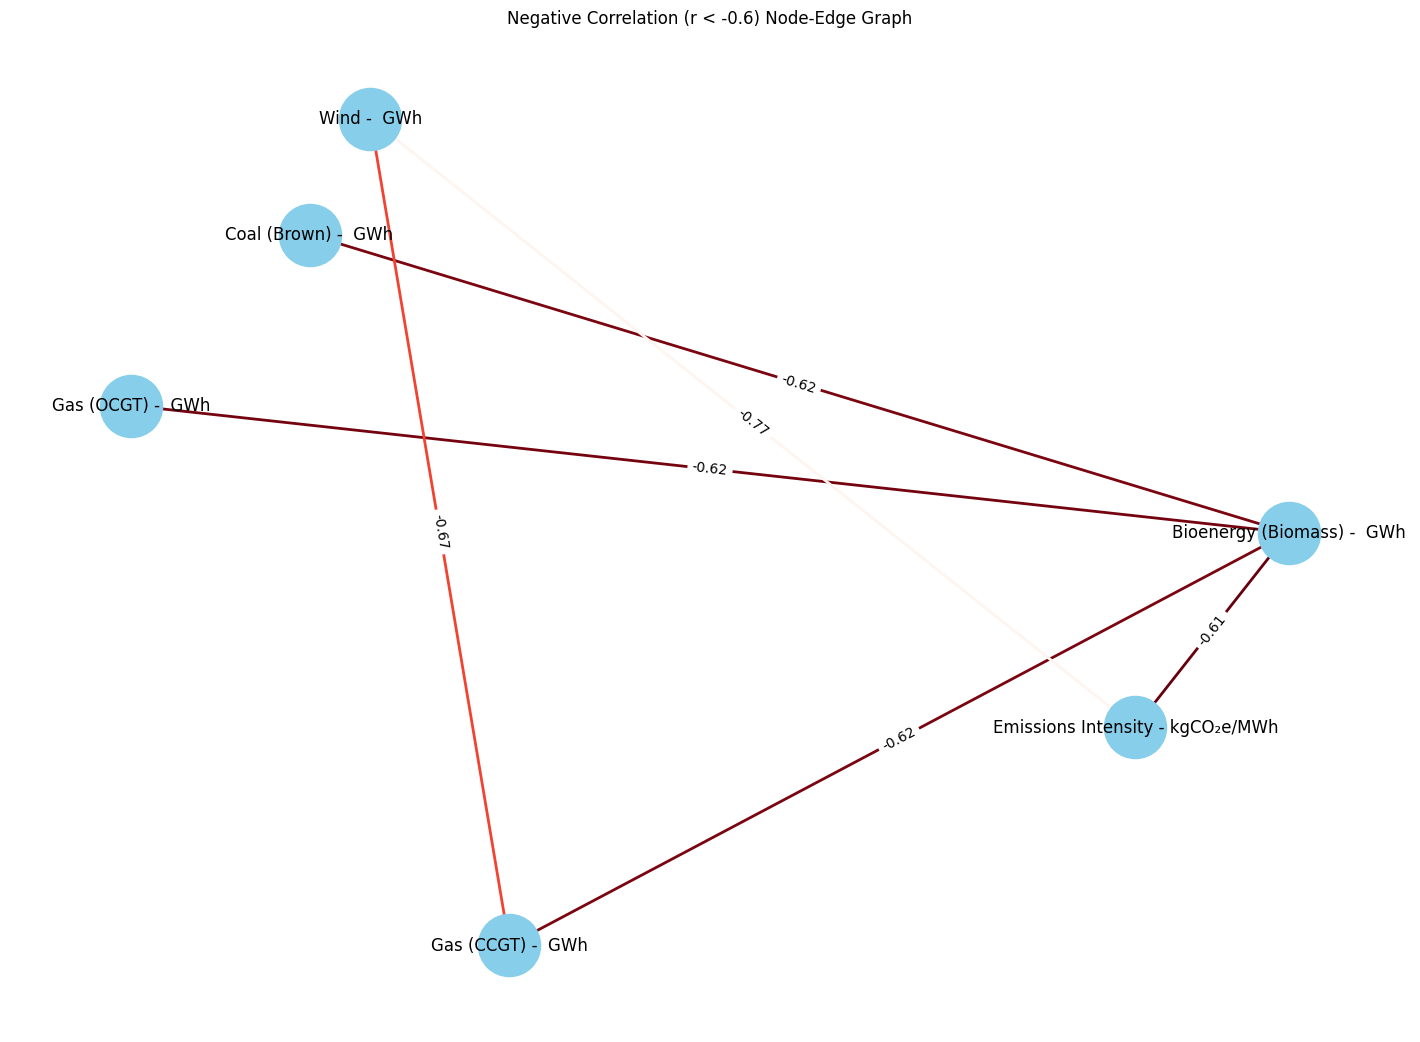

In [ ]:
# Function to create and plot node-edge graph with edge labels
def plot_node_edge_graph(corr_matrix, threshold, greater_than=True, title=""):
    if greater_than:
        mask = corr_matrix >= threshold
    else:
        mask = corr_matrix <= threshold

    edges = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iat[i, j]) for i in range(len(corr_matrix.index))
             for j in range(i+1, len(corr_matrix.columns)) if mask.iat[i, j]]

    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(graph, seed=42, k=0.3)  # Adjust the 'k' parameter to spread out nodes

    plt.figure(figsize=(14, 10))
    if len(graph.edges) > 0:
        edges, weights = zip(*nx.get_edge_attributes(graph, 'weight').items())
        nx.draw(graph, pos, node_color='skyblue', node_size=2000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues if greater_than else plt.cm.Reds, width=2)
        edge_labels = {(edge[0], edge[1]): f'{edge[2]["weight"]:.2f}' for edge in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')
    else:
        plt.text(0.5, 0.5, 'No strong correlations found', horizontalalignment='center', verticalalignment='center')
    plt.title(title)
    plt.show()

# Plot the positive correlation graph with edge labels (r > 0.6)
plot_node_edge_graph(correlation_matrix, 0.6, greater_than=True, title='Positive Correlation (r > 0.6) Node-Edge Graph')

# Plot the negative correlation graph with edge labels (r < -0.6)
plot_node_edge_graph(correlation_matrix, -0.6, greater_than=False, title='Negative Correlation (r < -0.6) Node-Edge Graph')

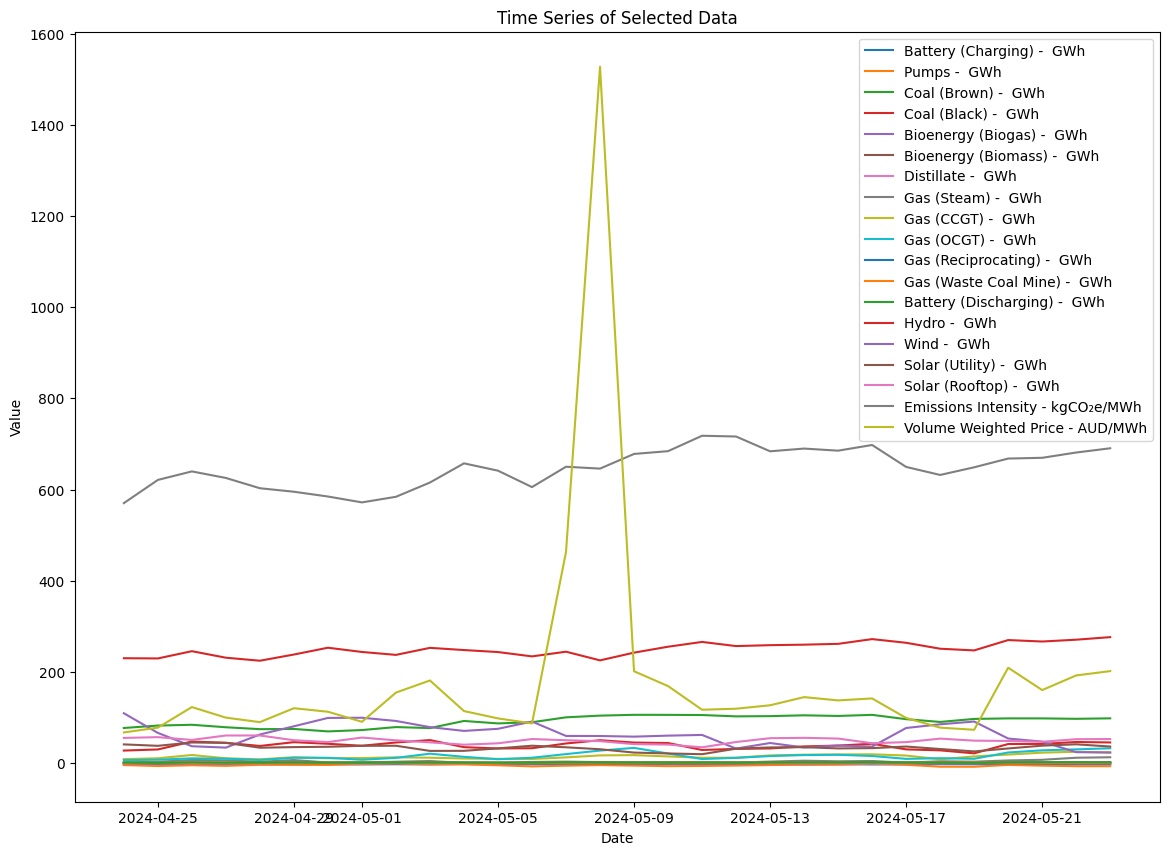

In [ ]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Plot time series for selected columns
plt.figure(figsize=(14, 10))
for column in columns_of_interest:
    plt.plot(data['date'], data[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Selected Data')
plt.legend(loc='upper right')
plt.show()
